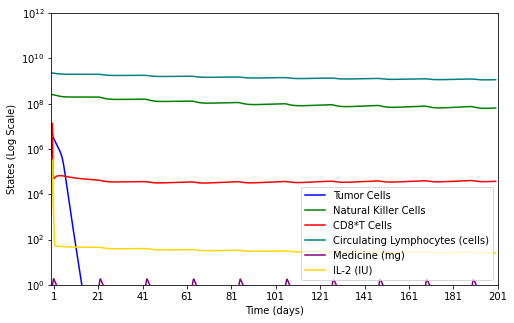

In [1059]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def vectorfield(w, t, parameters):
    """
    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    T, N, L, C, M, I = w
    a, b, c, KT, delT, e_f, f, p, pN, gN, KN, delN, m, theta, q, r1, r2, pI, gI, u, kappa, j, k, KL, delL, alpha_beta, beta, KC, delC, gamma, muI, omega, phi, zeta, d, l, s, vL_t, vM_t, vI_t = parameters
    
    D = d*(L/T)**l/(s+(L/T)**l)
    vM_t = 0

    if t>0.5:
        vL_t = 0

    if t>0.5:
        vI_t = 0

    if int(t)%21==0:
        vM_t = 2.3869

    dTdt = a*T*(1-b*T) - c*N*T - D*T - KT*(1-np.exp(-delT*M))*T
    dNdt = f*(e_f*C - N) - p*N*T + (pN*N*I)/(gN+I) - KN*(1-np.exp(-delN*M))*N
    dLdt = theta*m*L/(theta+I) + j*T*L/(k+T) - q*L*T + (r1*N + r2*C)*T - u*L**2*C*I/(kappa+I) - KL*(1 - np.exp(-delL*M))*L + pI*L*I/(gI+I) + vL_t
    dCdt = beta*(alpha_beta - C) - KC*(1-np.exp(-delC*M))*C
    dMdt = -gamma*M + vM_t
    dIdt = -muI*I + phi*C + omega*L*I/(zeta+I) + vI_t
   
    f = [dTdt, dNdt, dLdt, dCdt, dMdt, dIdt]
    return f

T = 10**7
N = 2.5*10**8 #
L = 5.268*10**5 #
C = 2.25*10**9 #
M = 0 #
I = 1073 #

w = [T, N, L, C, M, I]

a = 4.31*10**-1 #
b = 1.02*10**-9 #
c = 2.9077*10**-13 #
KT = 9*10**-1 #
delT = 1.8328 #
e_f = 1.11*10**-1 #
f = 1.25*10**-2 #
p = 2.794*10**-13 #
pN = 6.68*10**-2 #
gN = 2.5036*10**5 #
KN = 6.75*10**-2 #
delN = 1.8328 #
m = 9*10**-3 #
theta = 2.5036*10**-3 #
q = 3.422*10**-10 #
r1 = 2.9077*10**-11 #
r2 = 5.8467*10**-13 #
pI = 2.971 #
gI = 2.5036*10**3 #
u = 4.417*10**-14 #
kappa = 2.5036*10**3 #
j = 1.245*10**-2 #
k = 2.019*10**7 #
KL = 4.86*10**-2 #
delL = 1.8328 #
alpha_beta = 2.25*10**9 #
beta = 6.3*10**-3 #
KC = 3.4*10**-2 #
delC = 1.8328 #
gamma = 5.199*10**-1 #
muI = 11.7427 #
omega = 7.874*10**-2 #
phi = 2.38405*10**-7 #
zeta = 2.5036*10**3 #

# patient 9
d9 = 2.34 #
l9 = 2.09 #
s9 = 3.8*10**-3 #

# patient 10
d10 = 1.88 #
l10 = 1.81 #
s10 = 3.5*10**-2 #

vL_t = 1.77*10**10 #
vM_t = 2.3869 #
vI_t = 2.7859*10**6 #

parameters_9 = [a, b, c, KT, delT, e_f, f, p, pN, gN, KN, delN, m, theta, q, r1, r2, pI, gI, u, kappa, j, k, KL, delL, alpha_beta, beta, KC, delC, gamma, muI, omega, phi, zeta, d9, l9, s9, vL_t, vM_t, vI_t]
parameters_10 = [a, b, c, KT, delT, e_f, f, p, pN, gN, KN, delN, m, theta, q, r1, r2, pI, gI, u, kappa, j, k, KL, delL, alpha_beta, beta, KC, delC, gamma, muI, omega, phi, zeta, d10, l10, s10, vL_t, vM_t, vI_t]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-8

t = np.linspace(0, 200, num=1000)
# Call the ODE solver.
wsol = odeint(vectorfield, w, t, args=(parameters_10,), hmax=0.1,
              atol=abserr, rtol=relerr)

T_res = []
N_res = []
L_res = []
C_res = []
M_res = []
I_res = []

for i in wsol:
    T_res.append(i[0])
    N_res.append(i[1])
    L_res.append(i[2])
    C_res.append(i[3])
    M_res.append(i[4])
    I_res.append(i[5])

plt.plot(t, T_res, color='blue')
plt.plot(t, N_res, color='green')
plt.plot(t, L_res, color='red')
plt.plot(t, C_res, color='teal')
plt.plot(t, M_res, color='purple')
plt.plot(t, I_res, color='gold')
plt.yscale("log")
plt.ylim(1,10**12)
plt.xlim(0,200)
plt.xlabel("Time (days)")
plt.xticks(np.arange(1,220,20))
plt.ylabel("States (Log Scale)")
plt.legend(['Tumor Cells', 'Natural Killer Cells', 'CD8*T Cells', 'Circulating Lymphocytes (cells)','Medicine (mg)','IL-2 (IU)'],loc='lower right')
plt.rcParams['figure.figsize'] = [8, 5]
